# seaborn 막대 그래프

가장 기본이 되는 막대 그래프 함수인 `barplot()` 세부 사용 법 확인

## #01. 데이터 준비

1. 패키치 설치

In [12]:
from matplotlib import pyplot as plt
from pandas import read_excel, concat
import seaborn as sb

### 2. 데이터 가져오기

In [9]:
성적표df = read_excel('https://data.hossam.kr/D01/grade.xlsx')
성적표df

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,77,88,64
1,영희,2,여자,88,120,62,72
2,민철,1,남자,92,70,83,79
3,수현,3,여자,63,60,31,71
4,호영,4,남자,75,50,90,88
5,혜민,4,여자,80,88,91,72
6,용식,2,남자,82,88,79,90
7,나영,1,여자,90,92,81,95
8,석영,4,남자,91,90,89,80


In [10]:
# 데이터 확인 후 index 지정
성적표df = read_excel('https://data.hossam.kr/D01/grade.xlsx', index_col='이름')
성적표df

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
혜민,4,여자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,4,남자,91,90,89,80


### 3. 데이터 전처리

`seaborn`으로 filter, groupby, count로 전처리된 데이터를 사용해 시각화 등 작업을 진행할 수 있는 만큼 필수는 아님

In [11]:
df = 성적표df.astype({"학년": "category", "성별": "category"})
df.dtypes

학년    category
성별    category
국어       int64
영어       int64
수학       int64
과학       int64
dtype: object

### 4. 그래프 전역 설정

In [13]:
plt.rcParams["font.family"]='Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(7,4)
plt.rcParams['axes.unicode_minus']=False

## #02. 막대 그래프 그리기

### 1. 기본 사용 방법 - 일반적인 데이터 추출

`barplot()`함수는 기본적으로 집계가 완료된 데이터를 시각화

`x축`에 지정된 항목이 중복되지 않는다면 각 집단별 집계결과를 표시

index(이름)별 국어 점수

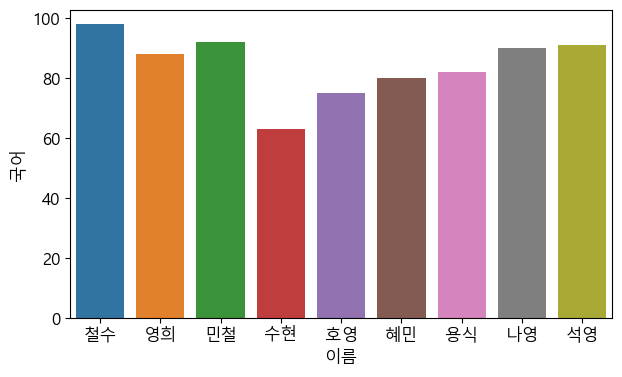

In [14]:
sb.barplot(data=df,
           x=df.index,
           y='국어')
plt.show()
plt.close()

### 2. 평균 막대 그래프 - 평균 값

`x축`에 지정된 데이터에 중복된 값이 있다면 y축은 평균값을 표시한다.

그래프에 표시되는 막대는 `95% 신뢰구간`을 의미

errorbar, ci로 신뢰구간 변경은 가능

학년별 국어점수

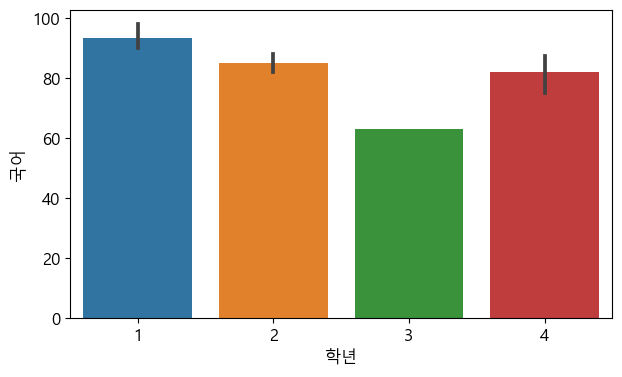

In [18]:
sb.barplot(data=df, x='학년', y='국어')
plt.show()
plt.close()

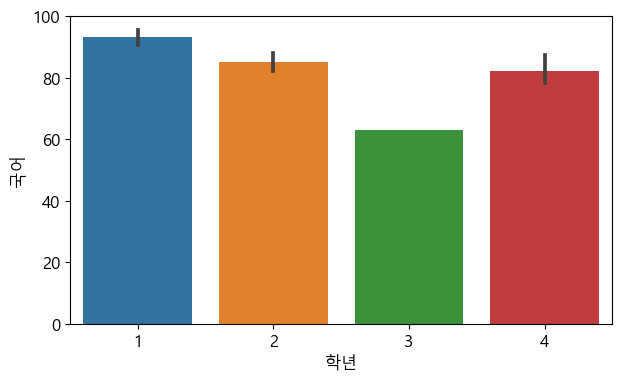

In [19]:
# 신뢰구간 변경 70%
sb.barplot(data=df, x='학년', y='국어', errorbar=('ci', 70))
plt.show()
plt.close()

### 3. 다른 지표 적용하기

`barplot()` 함수에 `estimator` 파라미터를 적용하면 다른 지표를 표시

합계

학년별 국어점수 합계

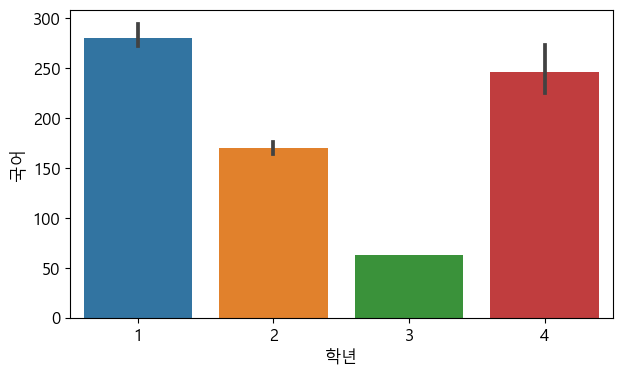

In [20]:
sb.barplot(
    data=df, x='학년', y='국어', estimator='sum'
)
plt.show()
plt.close()

최대값

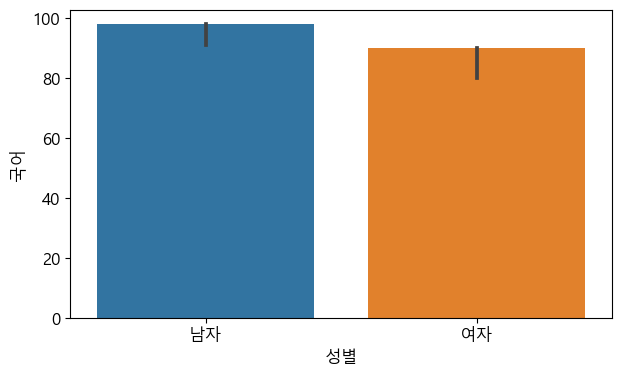

In [21]:
sb.barplot(data=df, x='성별',y='국어', estimator='max')
plt.show()
plt.close()

최소값

성별에 따른 국어점수 최소 값

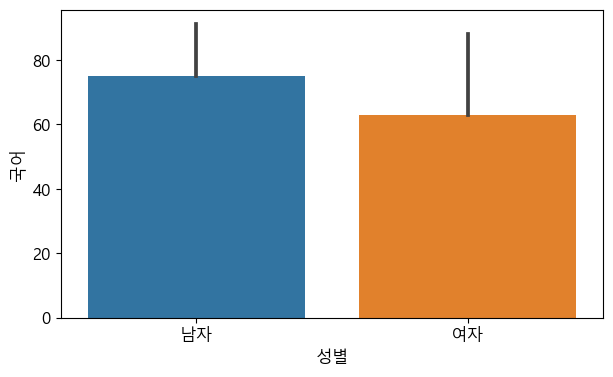

In [22]:
sb.barplot(data=df,
           x='성별',y='국어',estimator="min")
plt.show()
plt.close()

중앙값

데이터를 순서대로 나열한 후 가운데 위치한 값

편차의 영향이 가장 적은 값

학년별 국어 점수 중앙 값

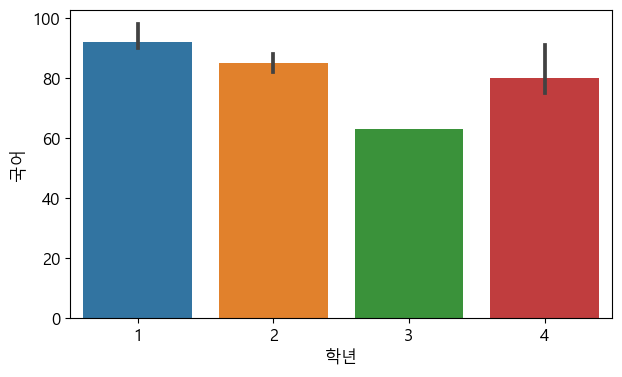

In [23]:
sb.barplot(data=df,
           x="학년",y="국어",estimator="median")
plt.show()
plt.close()

## #03. 범주에 따른 구분

`hue` 파라미터의 적용(데이터 구분 기준)

학년별 국어 점수의 중앙 값

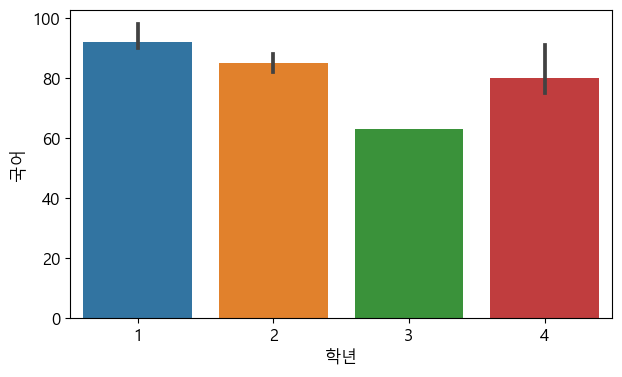

In [24]:
sb.barplot(data=df, x='학년', y='국어', estimator='median')
plt.show()
plt.close()

학년별 국어 점수의 중앙 값을 성별로 나눈다

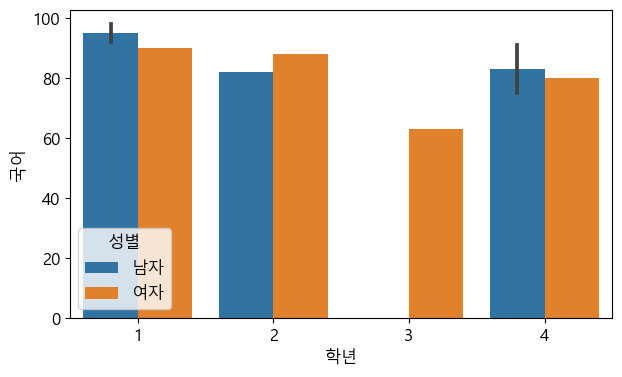

In [25]:
sb.barplot(data=df, x='학년', y='국어', hue='성별', estimator='median')
plt.show()
plt.close()

`범주` 위치 옮기기

loc, bbox_to_anchor

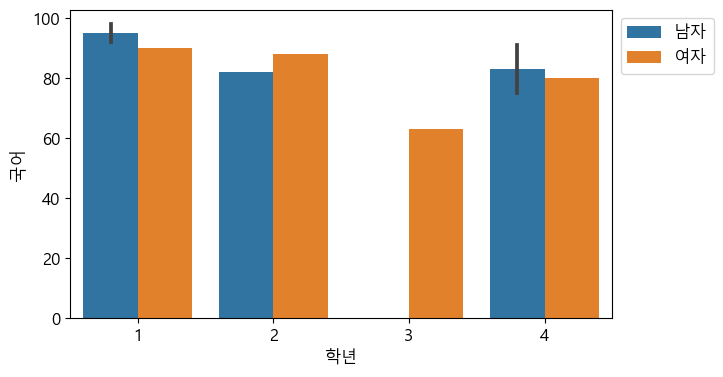

In [28]:
sb.barplot(data=df, x='학년', y='국어', hue='성별', estimator='median')
plt.legend(bbox_to_anchor=(1,1))
plt.show()
plt.close()

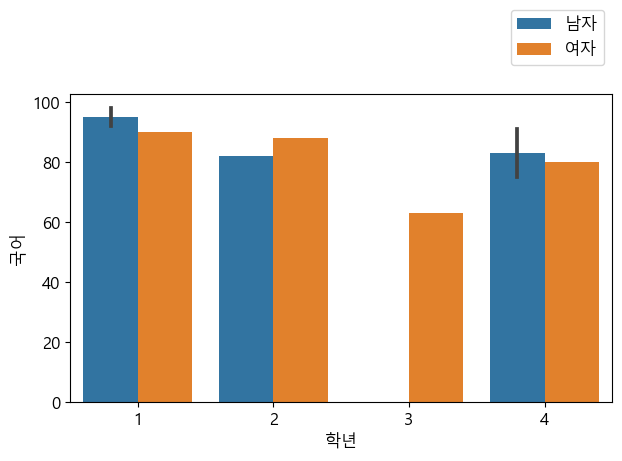

In [32]:
sb.barplot(data=df, x='학년', y='국어', hue='성별', estimator='median')
plt.legend(bbox_to_anchor=(1,1.3))
plt.show()
plt.close()

## 추가 내용

범주 적용을 위한 데이터 재배치

In [33]:
df1 = df.filter(['국어']).rename(columns={'국어':'점수'})
df1['과목'] = '국어'
df1

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


In [34]:
df2 = df.filter(['영어']).rename(columns={'영어': '점수'})
df2['과목'] = '영어'
df2

,점수,과목
이름,,
철수,77,영어
영희,120,영어
민철,70,영어
수현,60,영어
호영,50,영어
혜민,88,영어
용식,88,영어
나영,92,영어
석영,90,영어


In [35]:
df3 = concat([df1, df2])
df3

,점수,과목
이름,,
철수,98,국어
영희,88,국어
민철,92,국어
수현,63,국어
호영,75,국어
혜민,80,국어
용식,82,국어
나영,90,국어
석영,91,국어


index(이름)별 점수 데이터를 과목별로 분리

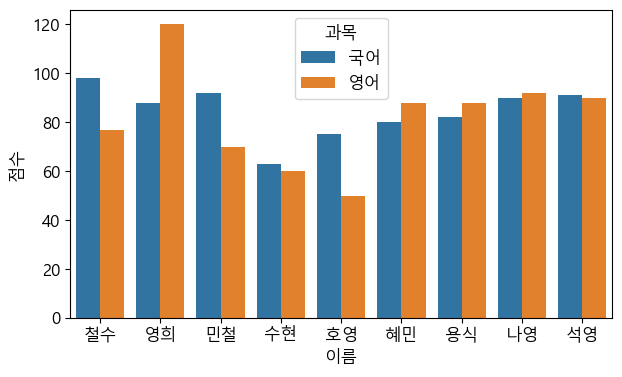

In [40]:
sb.barplot(
    data=df3, x=df3.index, y='점수', hue='과목')
plt.show()
plt.close()